# Exploratory Data Analysis

Here we will look at recent sales data for the 5 market areas and try to get a feel for what we have. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline


In [2]:
X= pd.read_csv('data/clean_data.csv')

## Part 1. Explore the columns
So far we have kept all the fields. Let's see what we have. 

In [3]:
X.columns

Index(['Accout Number', 'Property Type', 'Property Address Street Number',
       'Property Address Street Dir', 'Property Address Street Name',
       'Property Address Street Suffix', 'Property Address Unit Number',
       'Location', 'Design', 'Quality', 'Eff Yr Built', 'Above Grd SF',
       'Basemt Tot SF', 'Basemt Fin SF', 'Basemt Unf SF', 'Garage Type',
       'Garage SF', 'Est Land SF', 'Reception No', 'Sale Date (Mon-Yr)',
       'Sale Price', 'Time Adjust Sales Price', 'Market Area',
       'Unincorporated'],
      dtype='object')

Now we can explore each column one by one, come up with the better representation and then move on to relationships between variables. <br>

#### 'Location' variable.

In [4]:
X['Location'].unique()

array(['UNINCORPORATED', 'BOULDER', 'SUPERIOR', 'LOUISVILLE', 'ERIE',
       'LAFAYETTE'], dtype=object)

The only new information we're learning from 'Location' that is not already in a 'Market Area' is whether the location is unincorporated or not. So we can preserve the additional information with a binary variable. We will call new binary variable 'Unincorporated', where if  Unincorporated = 1, otherwise 0. 

In [5]:
X['Unincorporated']= 0
X.loc[X['Location']=='UNINCORPORATED', 'Unincorporated']=1
X['Unincorporated'].sum()

577

#### 'Design' variable

In [6]:
X['Design'].unique()

array(['Ranch', 'Split level', 'Bi Level', 'Multi Sty', 'Paired',
       '1 Sty Townh', 'Modular'], dtype=object)

In [7]:
X['Design_orig']= X['Design']

So for Design there is no obvious natural progression, so we prefer to one hot encode the variables and perhaps drop one category. 

In [8]:
X.columns

Index(['Accout Number', 'Property Type', 'Property Address Street Number',
       'Property Address Street Dir', 'Property Address Street Name',
       'Property Address Street Suffix', 'Property Address Unit Number',
       'Location', 'Design', 'Quality', 'Eff Yr Built', 'Above Grd SF',
       'Basemt Tot SF', 'Basemt Fin SF', 'Basemt Unf SF', 'Garage Type',
       'Garage SF', 'Est Land SF', 'Reception No', 'Sale Date (Mon-Yr)',
       'Sale Price', 'Time Adjust Sales Price', 'Market Area',
       'Unincorporated', 'Design_orig'],
      dtype='object')

In [9]:
# Convert the Country column to a one hot encoded Data Frame
X = pd.get_dummies(X, columns=['Design_orig'], prefix='Design')

In [10]:
sum(X['Design']=='Ranch')

1646

In [11]:

# declaring data
data = [sum(X['Design']=='Ranch'), sum(X['Design']=='Split level'),sum(X['Design']=='Bi Level'),sum(X['Design']=='Multi Sty'),
       sum(X['Design']=='Paired'),sum(X['Design']=='1 Sty Townh'),sum(X['Design']=='Modular')]
keys = ['Ranch', 'Split level', 'Bi Level', 'Multi Sty', 'Paired',
       '1 Sty Townh', 'Modular']
  
fig = px.pie(X, values=data, names=keys, title='Housing types')
fig.show()

In [12]:
fig = px.histogram(X, x="Design")
fig.show()

#### 'Quality' variable
So for quality there is a natural progression from Fair to Average to Good to Excellent. It seems that the assumption of equal distance between the quality levels is correct. So we recode it as a single variable

In [13]:
X['Quality'].unique()

array(['Avg ++', 'Avg', 'Avg +', 'Good ++', 'Good', 'V Good', 'Good +',
       'V Good +', 'V Good++', 'Excel', 'Excel+', 'Fair', 'Excel++'],
      dtype=object)

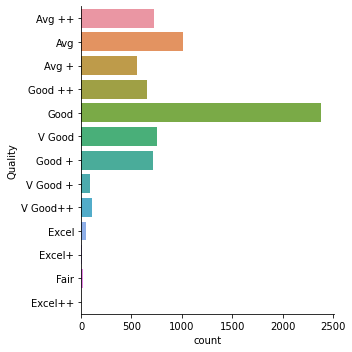

In [14]:
sns.catplot(y='Quality', data=X, kind='count')
plt.show()

In [15]:
# Create the Quality_cat column filled with zeros
X['Quality_cat'] = 0

X.loc[X['Quality']=='Avg', 'Quality_cat'] = 1
X.loc[X['Quality']=='Avg +', 'Quality_cat'] = 2
X.loc[X['Quality']=='Avg ++', 'Quality_cat'] = 3
X.loc[X['Quality']=='Good', 'Quality_cat'] = 4
X.loc[X['Quality']=='Good +', 'Quality_cat'] = 5
X.loc[X['Quality']=='Good ++', 'Quality_cat'] = 6
X.loc[X['Quality']=='V Good', 'Quality_cat'] = 7
X.loc[X['Quality']=='V Good +', 'Quality_cat'] = 8
X.loc[X['Quality']=='V Good++', 'Quality_cat'] = 9
X.loc[X['Quality']=='Excel', 'Quality_cat'] = 10
X.loc[X['Quality']=='Excel+', 'Quality_cat'] = 11
X.loc[X['Quality']=='Excel++', 'Quality_cat'] = 12

In [16]:
X.columns


Index(['Accout Number', 'Property Type', 'Property Address Street Number',
       'Property Address Street Dir', 'Property Address Street Name',
       'Property Address Street Suffix', 'Property Address Unit Number',
       'Location', 'Design', 'Quality', 'Eff Yr Built', 'Above Grd SF',
       'Basemt Tot SF', 'Basemt Fin SF', 'Basemt Unf SF', 'Garage Type',
       'Garage SF', 'Est Land SF', 'Reception No', 'Sale Date (Mon-Yr)',
       'Sale Price', 'Time Adjust Sales Price', 'Market Area',
       'Unincorporated', 'Design_1 Sty Townh', 'Design_Bi Level',
       'Design_Modular', 'Design_Multi Sty', 'Design_Paired', 'Design_Ranch',
       'Design_Split level', 'Quality_cat'],
      dtype='object')

In [17]:
fig = px.histogram(X, x="Quality_cat", title ='Property quality rating')
fig.show()

#### 'Garage Type' variable

In [18]:
X['Garage Type'].unique()

array(['Attached', 'Carport', 'Detached', 'None', 'Multiple', 'Basement',
       'Workshop'], dtype=object)

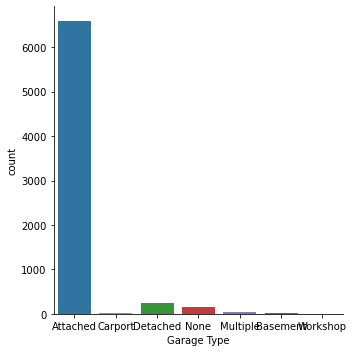

In [19]:
sns.catplot(x='Garage Type', data=X, kind='count')
plt.show()

For garage we will binarize to two categories 'attached' and 'other' since there are not many observations in other categories except attached. We create a new variable 'Garage Attached'

In [20]:
X['Garage Attached'] = 0
X.loc[X['Garage Type']=='Attached', 'Garage Attached'] = 1
X['Garage Attached'].sum()

6590

Encode market area as a categorical variable ranging from 1-5. I do not expect much effect from the market area, and perhaps a better idea would be to one hot encode them instead. 

In [21]:
X['Market Area Num']=X['Market Area']

In [22]:
# Convert the Country column to a one hot encoded Data Frame
X = pd.get_dummies(X, columns=['Market Area Num'], prefix='Market Area')

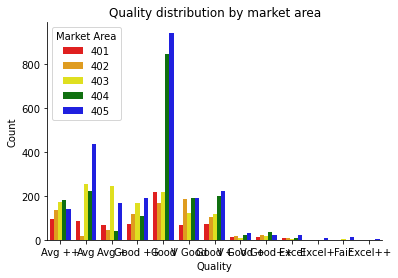

In [23]:
palette_colors = {401:'red', 402:'orange', 403:'yellow', 404:'green', 405: 'blue'}

# Create a count plot of school with location subgroups
sns.countplot(x='Quality', data=X, hue='Market Area', palette = palette_colors)
plt.title('Quality distribution by market area')
plt.xlabel('Quality')
plt.ylabel('Count')
sns.despine()
plt.show()

#### 'Above Grd SF' variable. 
We are interested in the distribution of square footage of single family homes.

In [24]:
X['Above Grd SF'].describe()

count    7080.000000
mean     2124.615960
std       810.667967
min       405.000000
25%      1519.000000
50%      2028.000000
75%      2636.250000
max      5311.000000
Name: Above Grd SF, dtype: float64

Text(0.5, 1.0, 'Basement and house area distribution')

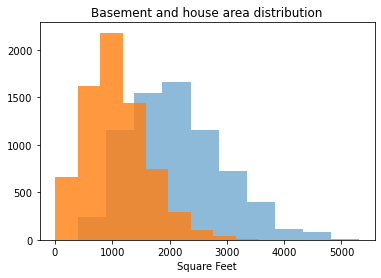

In [25]:
fig, ax = plt.subplots()
ax.hist(X['Above Grd SF'], alpha=0.5)
ax.hist(X['Basemt Tot SF'], alpha=0.8)
ax.set_xlabel('Square Feet')
ax.set_title ('Basement and house area distribution')


In [26]:
fig = px.box(X, y=["Above Grd SF"])
fig.show()

In [27]:
fig = px.box(X, y=["Basemt Tot SF"])
fig.show()

So let's explore the Time adjusted sale price for outliers.

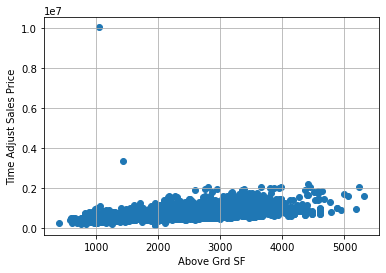

In [28]:
# Scatter plot
fig, ax = plt.subplots()
ax.scatter(X['Above Grd SF'], X['Time Adjust Sales Price'])

# x-axis label
ax.set_xlabel('Above Grd SF')

# y-axis label
ax.set_ylabel('Time Adjust Sales Price')
plt.grid()
plt.show()


We clearly have at least two outliers that will make our work much harder. Let's identify them and drop them. 

In [34]:
print(np.where(X['Time Adjust Sales Price']>3000000))

(array([], dtype=int64),)


In [35]:
X.iloc[4845:4847,]

Accout Number Property Type  Property Address Street Number  \
4847      R0081252           SFR                             111   
4848      R0081251           SFR                             113   

     Property Address Street Dir Property Address Street Name  \
4847                         NaN                         BASS   
4848                         NaN                         BASS   

     Property Address Street Suffix Property Address Unit Number   Location  \
4847                            CIR                          NaN  LAFAYETTE   
4848                            CIR                          NaN  LAFAYETTE   

           Design Quality  ...  Design_Paired  Design_Ranch  \
4847        Ranch     Avg  ...              0             1   
4848  Split level     Avg  ...              0             0   

      Design_Split level  Quality_cat  Garage Attached Market Area_401  \
4847                   0            1                1               0   
4848                   1            1                1               0   

      Market Area_402  Market Area_403  Market Area_404 Market Area_405  
4847                0                0                0               1  
4848                0                0                0               1  

[2 rows x 38 columns]

From the investigation, it clearly seems like those two properties must have had some error, since we don't expect small old house to cost 30 million USD. We drop these observations.

In [36]:
print("Old Shape: ", X.shape)
X.drop([4845, 4846],inplace=True)

print("New Shape: ", X.shape)

Old Shape:  (7078, 38)


KeyError: '[4845, 4846] not found in axis'

Now let's check the data visually again by plotting the scatterplot of Sales price vs Square footage

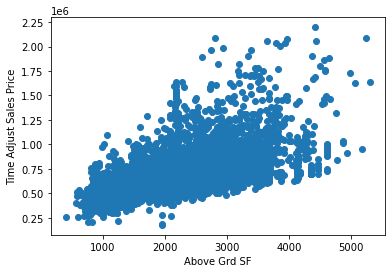

In [37]:
# Scatter plot
fig, ax = plt.subplots()
ax.scatter(X['Above Grd SF'], X['Time Adjust Sales Price'])

# x-axis label
ax.set_xlabel('Above Grd SF')

# y-axis label
ax.set_ylabel('Time Adjust Sales Price')
plt.show()

#### 'Est Land SF' variable 
Now let's look at land SF

In [38]:
print(X['Est Land SF'].describe())

fig = px.histogram(X, x="Est Land SF", title ='Land area')
fig.show()



count     7078.000000
mean      8314.243713
std       4249.518737
min       1056.000000
25%       6138.000000
50%       7380.000000
75%       9482.500000
max      80586.000000
Name: Est Land SF, dtype: float64


In [39]:
fig = px.scatter(X, y="Est Land SF", title ='Land area')
fig.show()

This doesn't look bad, there are only a few large properties over 1 acre. 

Let's look at sales price by the market area. 

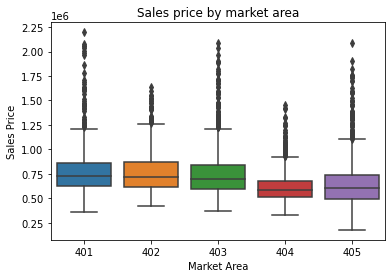

In [40]:
_ = sns.boxplot(x='Market Area', y='Time Adjust Sales Price', data=X)
_ = plt.xlabel('Market Area')
_ = plt.ylabel('Sales Price')
_= plt.title('Sales price by market area')
plt.show()

Looking at sale price by the market area, all areas seem about the same median, perhaps slightly lower in Erie and Lafayette. It seems like the cheapest properties are available in Lafayette and there is less variability in Superior and Erie. 

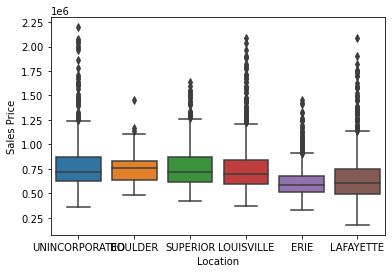

In [41]:
_ = sns.boxplot(x='Location', y='Time Adjust Sales Price', data=X)
_ = plt.xlabel('Location')
_ = plt.ylabel('Sales Price')
plt.show()

It looks like most many of the most expensive properties in Gunbarrel are actually in unincorporated land. 

### Part 2. Pairwise correlations 

In [42]:
X[['Sale Date (Mon-Yr)',
       'Sale Price', 'Time Adjust Sales Price', 'Market Area',
       'Unincorporated', 'Design_1 Sty Townh', 'Design_Bi Level',
       'Design_Modular', 'Design_Multi Sty', 'Design_Paired', 'Design_Ranch',
       'Design_Split level', 'Quality_cat', 'Garage Attached',
       'Market Area_401', 'Market Area_402', 'Market Area_403',
       'Market Area_404', 'Market Area_405']].head(4)

Sale Date (Mon-Yr)  Sale Price  Time Adjust Sales Price  Market Area  \
0         2017-11-03      517000            581143.136625          401   
1         2018-05-10      597000            652607.758723          401   
2         2019-06-21      531000            553206.861188          401   
3         2019-11-06      484000            495706.522160          401   

   Unincorporated  Design_1 Sty Townh  Design_Bi Level  Design_Modular  \
0               1                   0                0               0   
1               1                   0                0               0   
2               1                   0                0               0   
3               1                   0                0               0   

   Design_Multi Sty  Design_Paired  Design_Ranch  Design_Split level  \
0                 0              0             1                   0   
1                 0              0             1                   0   
2                 0              0             1                   0   
3                 0              0             0                   1   

   Quality_cat  Garage Attached  Market Area_401  Market Area_402  \
0            3                1                1                0   
1            3                1                1                0   
2            1                1                1                0   
3            3                1                1                0   

   Market Area_403  Market Area_404  Market Area_405  
0                0                0                0  
1                0                0                0  
2                0                0                0  
3                0                0                0

In [43]:
quantitative =['Eff Yr Built', 'Above Grd SF',
       'Basemt Tot SF', 'Basemt Fin SF', 'Basemt Unf SF', 
       'Garage SF', 'Est Land SF',  
       'Sale Price', 'Time Adjust Sales Price', 'Market Area',
       'Unincorporated', 'Design_1 Sty Townh', 'Design_Bi Level',
       'Design_Modular', 'Design_Multi Sty', 'Design_Paired', 'Design_Ranch',
       'Design_Split level', 'Quality_cat', 'Garage Attached',
       'Market Area_401', 'Market Area_402', 'Market Area_403',
       'Market Area_404', 'Market Area_405']

In [44]:
quant =X[quantitative]

<AxesSubplot:>

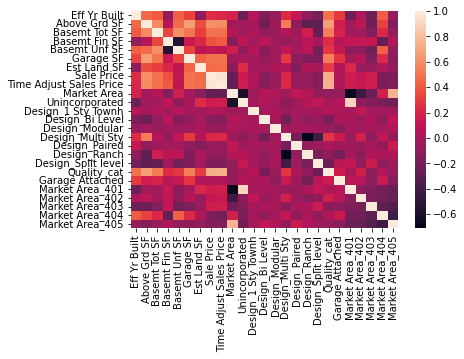

In [45]:
# calculate the correlation matrix
corr = quant.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

One thing is Unincorporated seems to be fully correlated with market area 401. Now I would like to see how the unincorporated properties are distributed between market areas. 

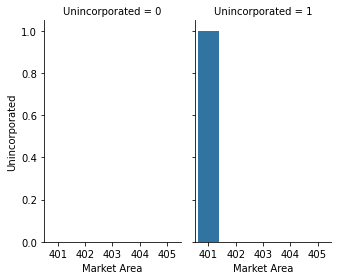

In [46]:
sns.catplot(
    data=X, x="Market Area", y="Unincorporated", col="Unincorporated",
    kind="bar", height=4, aspect=.6,
)
plt.show()


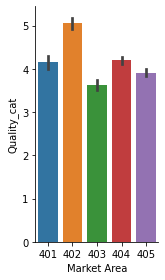

In [47]:
sns.catplot(
    data=X, x="Market Area", y="Quality_cat", 
    kind="bar", height=4, aspect=.6,
)

It look like all the unincorporated properties are in Gunbarrel and none in other Market Areas.

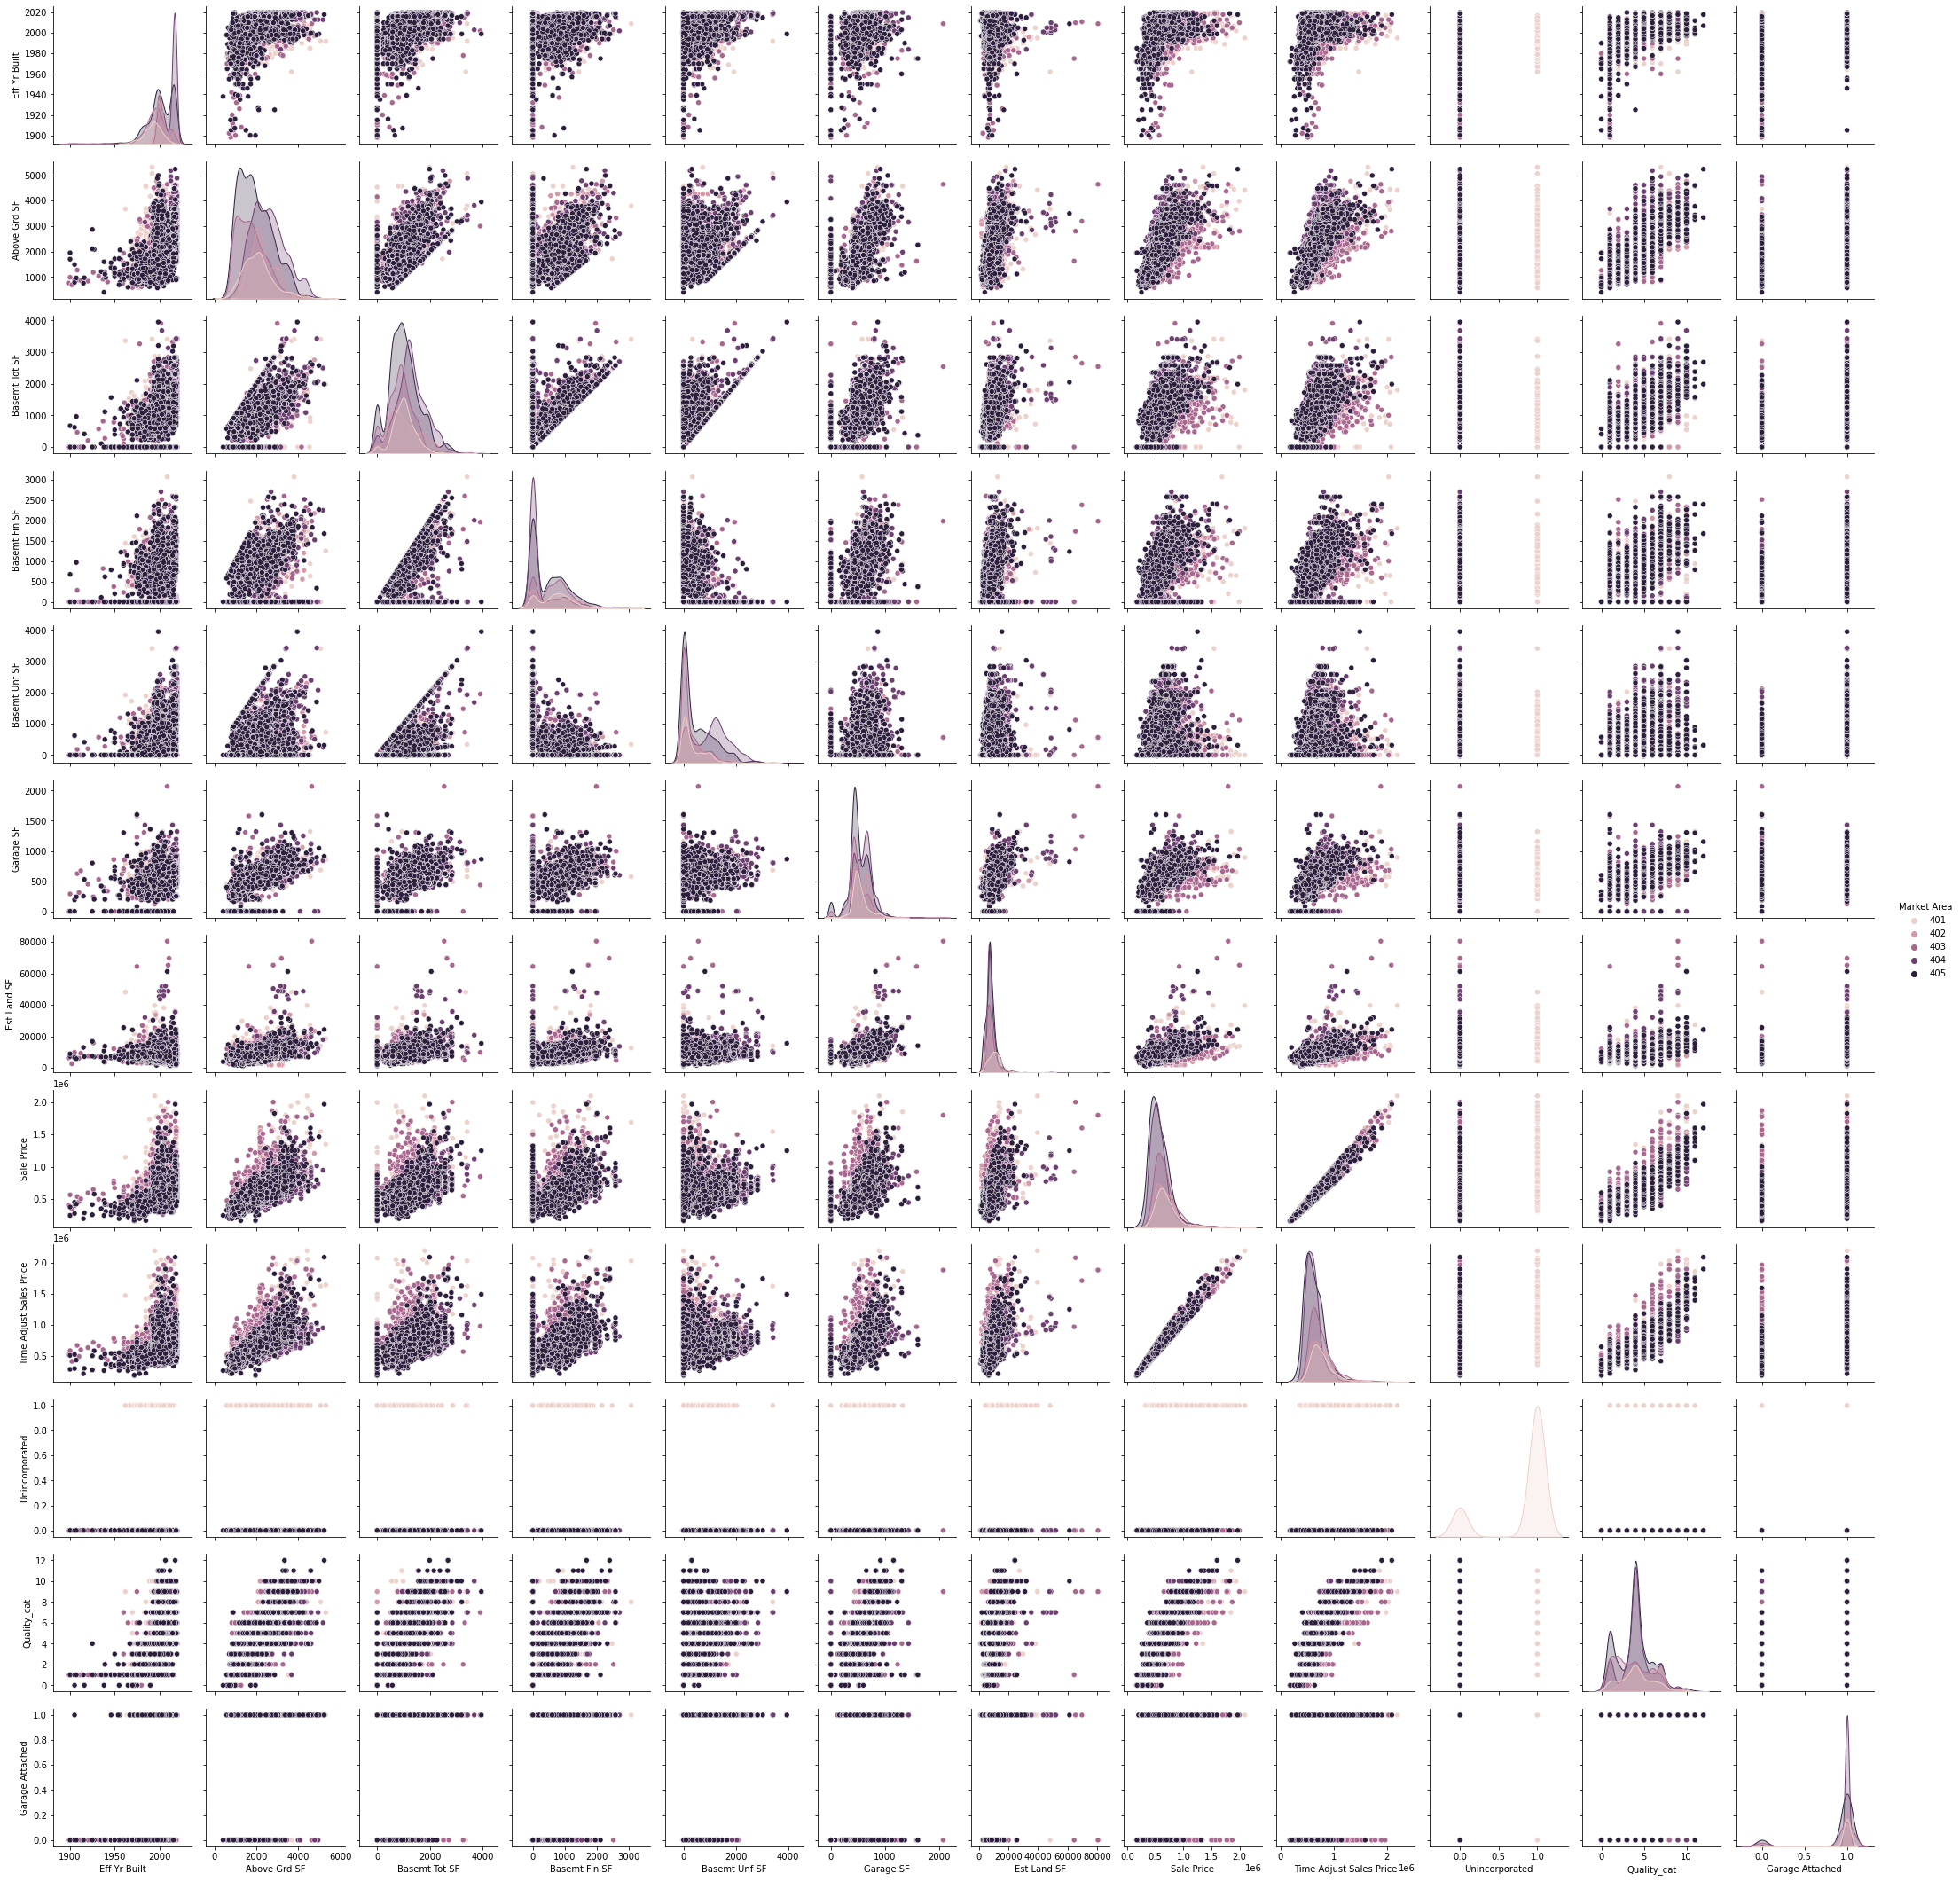

In [68]:
quant_no_dummies =X[['Eff Yr Built', 'Above Grd SF',
       'Basemt Tot SF', 'Basemt Fin SF', 'Basemt Unf SF', 
       'Garage SF', 'Est Land SF',  
       'Sale Price', 'Time Adjust Sales Price', 'Market Area',
       'Unincorporated', 'Quality_cat', 'Garage Attached']]
sns.pairplot(quant_no_dummies,hue ='Market Area')
plt.show()

<AxesSubplot:>

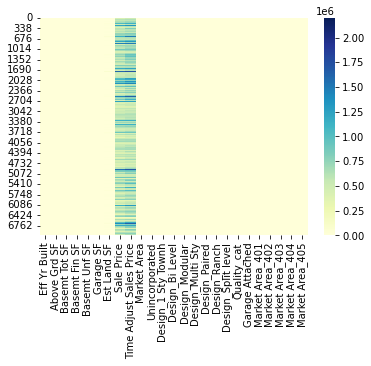

In [62]:
sns.heatmap(quant,cmap="YlGnBu")

In [ ]:
sns.lmplot(data=X, x="Above Grd SF", y="Time Adjust Sales Price")

In [ ]:
sns.lmplot(data=X, x="Basemt Tot SF", y="Time Adjust Sales Price")

In [ ]:
sns.lmplot(data=X, x="Quality_cat", y="Time Adjust Sales Price")

In [ ]:
corr[corr>0.5]


In [ ]:
quantitative =['Eff Yr Built', 'Above Grd SF',
       'Basemt Tot SF', 'Basemt Fin SF', 'Basemt Unf SF', 
       'Garage SF', 'Est Land SF',  
       'Sale Price', 'Time Adjust Sales Price', 'Market Area',
       'Unincorporated', 'Design_1 Sty Townh', 'Design_Bi Level',
       'Design_Modular', 'Design_Multi Sty', 'Design_Paired', 'Design_Ranch',
       'Design_Split level', 'Quality_cat', 'Garage Attached',
       'Market Area_401', 'Market Area_402', 'Market Area_403',
       'Market Area_404', 'Market Area_405']

### Are there variables that are particularly significant in terms of explaining the answer to your project question?
The significant variables for our analysis are:  <br>
● the year the house was built <br>
● above ground square footage<br>
● Basement square footage<br>
● basement finished square footage<br>
● Garage square footage<br>
● garage type<br>
● land square footage<br>
● house design<br>
● market area <br>

● Are there significant differences between subgroups in your data that may be relevant to your project aim?

Most Market Area subgroups seem to be pretty uniform, with Gunbarrel having unincorporated properties. 

● Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?

There are strong correlations between time adjusted sale price and sale price, so keep time adjusted sale price only. 
Next there is some correlation between unincorporated and gunbarrel market area since there are only unincorporated properties in Gunbarrel.

There are no other correlations greater than 0.8.

There is significant correlation between quality and sale price of 0.74.
There is significant correlation of 0.66 between Garage SF and Above Grd SF. 
There is significant correlation of 0.6 between Basement total and Basement unfinished. 

Correlation 0.59 between the above ground SF and sale price.
Correlation of 0.5 between garage SF and basement total SF.
Multi story design correlated with above grd SF at 0.53
Quality is correlated with Basement and Garage SF at 0.53 and 0.54. 
All of the above mentioned correlations are significant.

Looking at categorical variables, we can do chi square test by looking at quality and design or quality and market area. Testing Market Area and Quality, design and quality and Market area and Design, all pairs are not independent. 

Let's test the hypothesis that Market Area and Quality are independent. We will calculate a contingency table and perform a chi squared test. 

In [50]:
pd.crosstab(X['Market Area'], X['Quality'])

Quality      Avg  Avg +  Avg ++  Excel  Excel+  Excel++  Fair  Good  Good +  \
Market Area                                                                   
401           85     65      93      9       1        0     0   219      70   
402           16     44     136      8       0        0     0   165     103   
403          254    243     171      2       0        0     4   216     119   
404          223     39     180      9       0        0     0   845     198   
405          435    167     140     22       7        2    13   941     223   

Quality      Good ++  V Good  V Good +  V Good++  
Market Area                                       
401               73      66        13        12  
402              119     184        18        24  
403              166     120        10        16  
404              108     190        20        35  
405              191     192        30        24

In [51]:
from scipy.stats import chi2_contingency
  
# defining the table
data = pd.crosstab(X['Market Area'], X['Quality'])
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 8.239657752745073e-190
Dependent (reject H0)


Now let's test the relationship between design and quality

In [52]:
# defining the table
data = pd.crosstab(X['Design'], X['Quality'])
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


Now let's test the relationship between design and Market Area

In [54]:
# defining the table
data = pd.crosstab(X['Market Area'], X['Design'])
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.921839970488712e-167
Dependent (reject H0)


For quantitative variables we'll use pearson's r

In [55]:
from scipy.stats.stats import pearsonr

#calculation correlation coefficient and p-value between x and y
pearsonr(X['Quality_cat'], X['Time Adjust Sales Price'])


(0.7402263907768818, 0.0)

And since the corresponding p-value is less than .05, we conclude that there is a statistically significant association between the two variables.

In [56]:
pearsonr(X['Garage SF'], X['Above Grd SF'])

(0.6651244171542746, 0.0)

In [57]:
pearsonr(X['Basemt Tot SF'],X['Basemt Unf SF'])

(0.6005628511244657, 0.0)

In [58]:
pearsonr(X['Basemt Tot SF'], X['Garage SF'])

(0.5071249854693447, 0.0)

In [59]:
pearsonr(X['Basemt Tot SF'], X['Quality_cat'])

(0.5372670612495279, 0.0)

In [60]:
pearsonr(X['Quality_cat'], X['Garage SF'])

(0.5433351927820033, 0.0)

So now it's time to save our X and Y variables ready for analysis. We keep the time adjusted sales price and drop the unfinished basement variable. 

In [64]:
X.columns

Index(['Accout Number', 'Property Type', 'Property Address Street Number',
       'Property Address Street Dir', 'Property Address Street Name',
       'Property Address Street Suffix', 'Property Address Unit Number',
       'Location', 'Design', 'Quality', 'Eff Yr Built', 'Above Grd SF',
       'Basemt Tot SF', 'Basemt Fin SF', 'Basemt Unf SF', 'Garage Type',
       'Garage SF', 'Est Land SF', 'Reception No', 'Sale Date (Mon-Yr)',
       'Sale Price', 'Time Adjust Sales Price', 'Market Area',
       'Unincorporated', 'Design_1 Sty Townh', 'Design_Bi Level',
       'Design_Modular', 'Design_Multi Sty', 'Design_Paired', 'Design_Ranch',
       'Design_Split level', 'Quality_cat', 'Garage Attached',
       'Market Area_401', 'Market Area_402', 'Market Area_403',
       'Market Area_404', 'Market Area_405'],
      dtype='object')

In [69]:
data_for_modeling = X[['Eff Yr Built', 'Above Grd SF',
       'Basemt Tot SF', 'Basemt Fin SF',
       'Garage SF', 'Est Land SF',  
       'Unincorporated', 'Design_1 Sty Townh', 'Design_Bi Level',
       'Design_Modular', 'Design_Multi Sty', 'Design_Paired', 'Design_Ranch',
       'Design_Split level', 'Quality_cat', 'Garage Attached',
       'Market Area_401', 'Market Area_402', 'Market Area_403',
       'Market Area_404', 'Market Area_405','Time Adjust Sales Price']]

In [70]:
data_for_modeling.to_csv('data/data_for_modeling.csv', index=False)